<a href="https://colab.research.google.com/github/llai7/MATH227C/blob/main/Math227C20Sp_P08_LuluLai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library("ggplot2")

In [4]:
# plot settings
options(repr.plot.width=5, repr.plot.height=4)
install.packages("ggplot2")
library("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Problem Set 8: k-Nearest-Neighbors and the variance-bias tradeoff

In polynomial regression, we use data to learn a model $y(x)$, (specifically, we learn the coefficients $\beta$) so that we may predict what $y_i$ is generated by an $x_i$. One challenge is choosing the proper order of polynomial. Too low-order, and you will bias the model towards a simple explanation. Too high-order, and your model will vary for slightly different input data. 

In this problem set, we observe the same variance-bias tradeoff in a different method of learning a predictive model.

## k-Nearest-Neighbors

Neutrophils are white blood cells that activate to fight infection. Active neutrophils have slightly different size and deformability compared to inactive neutrophils.  

Suppose you have build a high-throughput cell measurement tool that detects the size and deformability of cells. 

Let $x_1$ be the size of the cell, minus the mean size of all cells, and $x_2$ be the deformability of the cell, minus the mean deformability of all cells. (This means a scatter plot of $x_1$ and $x_2$ are centered at $(0,0)$.)

Suppose you have $N$ observations of $y, x_1, x_2$ where $y=1$ for active and $y=0$ for inactive cells. 

In the k-Nearest-Neighbors model, a new point $(x^n_1,x^n_2)$ has a probabilty of having $y^n=1$ given by
$$P(y^n=1) = \frac{1}{k} \sum_{i\in k \mbox{nearest}} I(y^i=1)$$
where $k \mbox{nearest}$ are the k nearest neighbors and $I(y^i=1)=1$ is the indicator function that $y^i==1$. 



In [5]:

make_synthetic_data <-function(){

  # This function generates a sample of synthetic data.
  # The sample size is 4.25*NPerQuadrant. 
  # So, if NPerQuadrant=100, then the sample size is 425. 
  # It returns a dataframe with three columns:
  # Activated: a zero or one depending on whether the cell is active or not
  # Size
  # Deformability

  NPerQuadrant <- 100

  x_1_mean1 <- +0.6
  x_1_mean2 <- -0.6
  x_1_mean3 <- +0.6
  x_1_mean4 <- -0.4
  x_1_mean5 <- +0.4
  x_2_mean1 <- +0.6
  x_2_mean2 <- +0.6
  x_2_mean3 <- -0.5
  x_2_mean4 <- -0.6
  x_2_mean5 <- +0.9

  x_1_std1 <- 0.5
  x_1_std2 <- 0.4
  x_1_std3 <- 0.5
  x_1_std4 <- 0.5
  x_1_std5 <- 0.1

  x_2_std1 <- 0.6
  x_2_std2 <- 0.3
  x_2_std3 <- 0.4
  x_2_std4 <- 0.4
  x_2_std5 <- 0.2

  sizes1 = rnorm(NPerQuadrant,x_1_mean1,x_1_std1)
  sizes2 = rnorm(NPerQuadrant,x_1_mean2,x_1_std2)
  sizes3 = rnorm(NPerQuadrant,x_1_mean3,x_1_std3)
  sizes4 = rnorm(NPerQuadrant,x_1_mean4,x_1_std4)
  sizes5 = rnorm(NPerQuadrant/4,x_1_mean5,x_1_std5)

  deformabilities1 = rnorm(NPerQuadrant,x_2_mean1,x_2_std1)
  deformabilities2 = rnorm(NPerQuadrant,x_2_mean2,x_2_std2)
  deformabilities3 = rnorm(NPerQuadrant,x_2_mean3,x_2_std3)
  deformabilities4 = rnorm(NPerQuadrant,x_2_mean4,x_2_std4)
  deformabilities5 = rnorm(NPerQuadrant/4,x_2_mean5,x_2_std5)

  sizes = c(sizes1,sizes2, sizes3,sizes4,sizes5)
  deformabilities = c(deformabilities1,deformabilities2, deformabilities3,deformabilities4,deformabilities5)

  activated = c(rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(0,NPerQuadrant), rep(0,NPerQuadrant/4))

  dfSyntheticData <- data.frame("Activated" = activated, "Size" = sizes, "Deformability" = deformabilities)

  # shuffle
  dfSyntheticData <- dfSyntheticData[sample(nrow(dfSyntheticData)),]

  return(dfSyntheticData)

}


,Activated,Size,Deformability
,<dbl>,<dbl>,<dbl>
230,1,0.9469574,-0.15987711
166,1,-0.3340083,0.72559561
324,0,-0.3665501,-1.16155903
370,0,-0.4169828,-0.19866286
32,1,0.4770975,0.75474165
312,0,-0.2074296,0.06719065


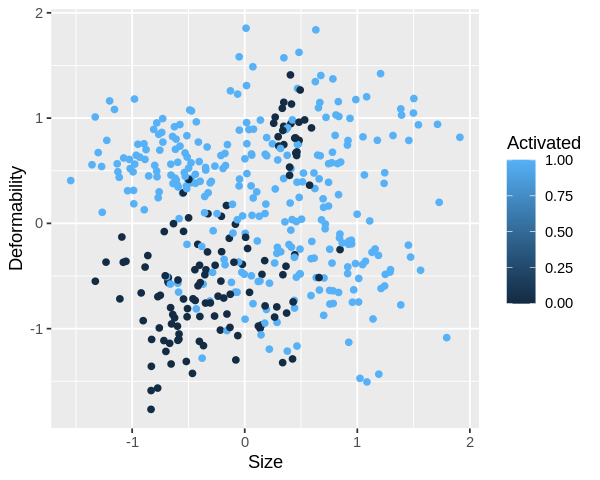

In [6]:
# generate a sample of synthetic data and plot it

dfSyntheticData1 <- make_synthetic_data()

head(dfSyntheticData1)

ggplot(dfSyntheticData1, aes(x=Size, y=Deformability, color=Activated)) + geom_point()

## Perform k-nearest-neighbors learning

For this part, let's choose $k=1$ arbitrarily.

In [7]:
# For this part, let's just choose a k value arbitrarily.

library(class)

In [8]:
# To see the predictions made by the knn algorithm, we generate a random uniform set of 2000 pairs of sizes and deformabilities.

testValues = cbind(runif(2000,-2,2),runif(2000,-2,2))

# Now do the training using the synthetic

train.df <- dfSyntheticData1[,c("Size","Deformability")]
train.factor <- dfSyntheticData1$Activated

knn.predValues = knn(train.df, testValues, train.factor, k=1)

,Activated,Size,Deformability
,<fct>,<dbl>,<dbl>
1,1,1.08372902,-1.1570324
2,1,-1.94598062,1.3450828
3,1,-0.92557137,1.5250393
4,0,-0.80415892,-0.9867583
5,0,-0.07716592,-1.0344729
6,0,-0.47278409,-1.0327361


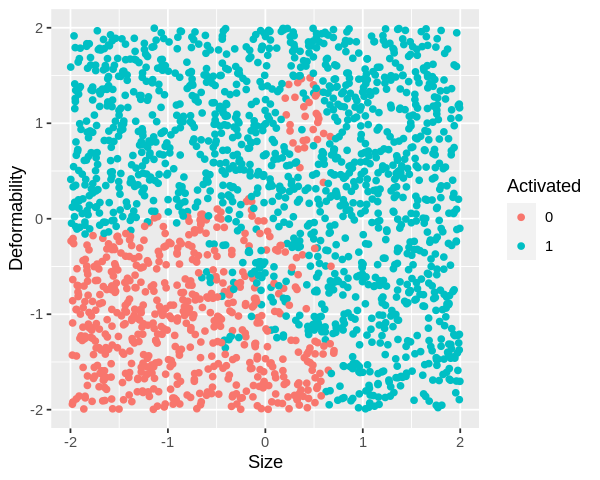

In [9]:
# plot the test results
dfTest = data.frame("Activated" = knn.predValues, "Size" = testValues[,1], "Deformability" = testValues[,2])
head(dfTest)
ggplot(dfTest, aes(x=Size, y=Deformability, color=Activated)) + geom_point()

## Variance-bias tradeoff in kNN

This method has several advantages over, e.g., logistic regression. For example, it can more easily handle curved boundaries between the two cell types.

However, the same challenge as with polynomial regression remains: How do you choose $k$? If you choose $k$ too small, you will have a very rough boundary, and the predictions will vary if you had a slightly different sample. If you choose $k$ too large, you will bias your predictions to a smoother boundary, missing details.



## Part 1

As our Goodness of Fit measure, we will use the __fraction of correct predictions__ (out of 425). 

Use the `make_synthetic_data()` function to create a new synthetic data set, of size 425, and call it `dfSyntheticData2`. 

Use knn with $k=1$, learned using the original data set (stored in `dfSyntheticData1`) to predict whether the cells in `dfSyntheticData2` are active or inactive, and compute the goodness of fit. 

In [10]:
set.seed(500555)

dfSyntheticData2 = make_synthetic_data()
testValues = dfSyntheticData2[,c("Size","Deformability")]
train.df <- dfSyntheticData1[,c("Size","Deformability")]
train.factor <- dfSyntheticData1$Activated

knn.predValues = knn(train.df, testValues, train.factor, k=1)
sum(((knn.predValues) == (dfSyntheticData2$Activated)))/425

[1] 0.8

## Part 2

Still for a fixed $k=1$. 

Compute the average goodness of fit for 100 repeated simulated samples `dfSyntheticData2`, each of size 425, always using the knn model learned using the original data set `dfSyntheticData1`. (Note we could not do this in real life.)

In [11]:
gof_list=list()

for (i in 1:100) {
  dfSyntheticData2 <- make_synthetic_data()
  testValues <- dfSyntheticData2[,c("Size","Deformability")]
  knn.predValues = knn(train.df, testValues, train.factor, k=1)
  gof = sum(((knn.predValues) == (dfSyntheticData2$Activated)))/425

  gof_list[i]= gof 
} 

In [18]:
mean(as.numeric(gof_list))

[1] 0.8154118

The mean goodness of fit value is 0.82.

## Part 3

Now for variable $k$, compute the average goodness-of-fit over 100 repeated samples, each of size 425, as above. 

First, you may do this by manually experimenting with different $k$ values. What $k$ value optimizes the goodness-of-fit?

Next, perform a sweep over $k=1$ to $k=200$. Plot Goodness-of-fit versus $k$. What is the $k$ value that optimizes goodness-of-fit?


In [30]:
gof_list2 = list()
for (k in 1:200) {
  gof_list = c()
  for (i in 1:100) {
  dfSyntheticData2 <- make_synthetic_data() #create dataaset 100x
  testValues <- dfSyntheticData2[,c("Size","Deformability")]
  knn.predValues = knn(train.df, testValues, train.factor, k=k)
  gof = sum(knn.predValues == dfSyntheticData2$Activated)/425
  gof_list[i]= gof 
  } 
  gof_list2[k] = mean(gof_list)
}

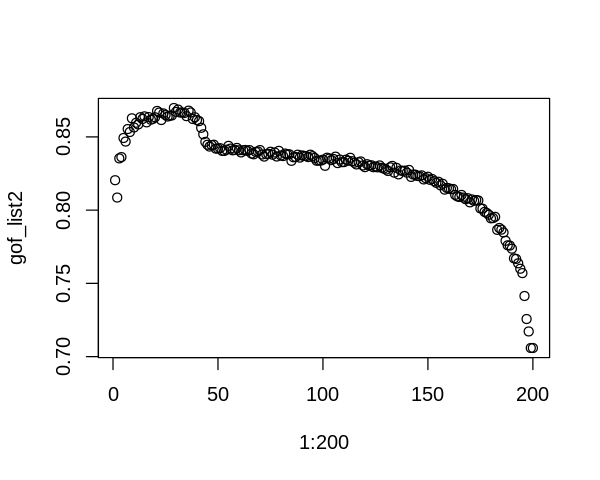

In [21]:
plot(1:200, gof_list2)

In [32]:
df2 <- data.frame(k=1:200, gof_list2 = unlist(gof_list2))
df2[which(df2$gof_list2==max(df2$gof_list2)),]

,k,gof_list2
,<int>,<dbl>
25,25,0.8683294


When k=25 the goodness of fit is optimized.

## Part 4

The function knn has a built-in feature to perform __cross-validation__. Read [the knn.cv function documentation](https://www.rdocumentation.org/packages/class/versions/7.3-19/topics/knn.cv). Perform cross-validation over a range of $k=1$ to $k=200$. Pick whatever you want for splitting the data into a training set and validation set.

What value of $k$ optimized goodness-of-fit according to cross-validation?

Does it agree with the value of $k$ found in Part 3?

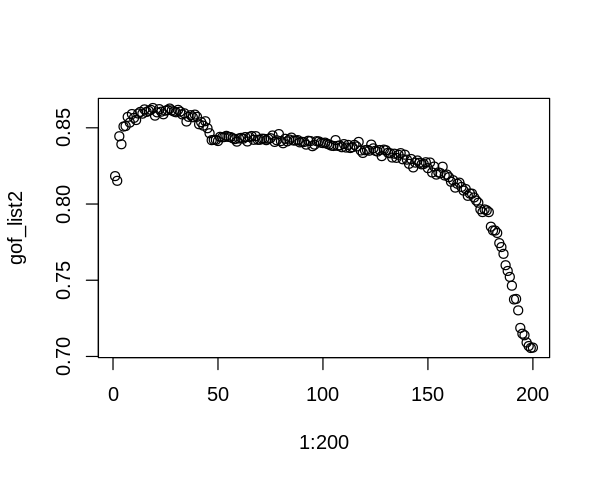

In [25]:
gof_list2 <- list()

for (k in 1:200) {
  gof_list = list()
  for (i in 1:100) {
  dfSyntheticData2 <- make_synthetic_data()
  knn.predValues = knn.cv(dfSyntheticData2[,c("Size","Deformability")], dfSyntheticData2$Activated, k=k)
  gof = sum(knn.predValues == dfSyntheticData2[,1])/425
  gof_list[i]= gof
  } 
  gof_list2[k] = mean(unlist(gof_list))
}
plot(1:200, gof_list2)

In [29]:
df2 <- data.frame(k=1:200, gof_list2 = unlist(gof_list2))
df2[which(df2$gof_list2==max(df2$gof_list2)),]

,k,gof_list2
,<int>,<dbl>
19,19,0.8629882


When k=19 the goodness of fit is optimized. The value is different from what I found in part 3.